### 데이터 불러오기
- eda_data.csv : 전처리 + BT + EDA 적용한 train data

In [3]:
### 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=True)
plt.rcParams.update({
    'font.size': 7,          # 폰트 크기
    'figure.dpi': 150,        # DPI 설정
    'savefig.dpi': 300        # 저장 시 DPI 설정
})

In [4]:
### 데이터 불러오기
df = pd.read_csv('eda_data.csv', encoding='utf-8')
print(df.shape)
df.head()

(2026, 2)


,bt_reviews,keyword2
0,노포 식당 요즘 인기 있는 곳이래서 왔어요 주꾸미 삼겹살 꽃게 새우 사리 추가해서 ...,친절해요
1,부모님 모시고 감 샐러드 크림파스타 피자 다 너무 잘 드심 친절하고 스테이크도 맛있...,친절해요
2,오버 안 하고 살면서 먹은 닭도리탕 중 가장 맛있었던 것 같아요 풍년 닭도리탕 원래...,친절해요
3,카카오맵 평점이 너무 좋아서 갔는데 역시 맛집이어서 너무 좋았어요 아쟁반으로 해서 ...,친절해요
4,허영만의 백반 기행에도 나온 신촌 고기창고 점심에는 고기도 구워 먹을 수 있고 소고...,친절해요


### 토큰화

In [7]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 35.2 MB/s eta 0:00:00


In [8]:
### konlpy 토큰화
from konlpy.tag import Okt, Hannanum, Kkma, Komoran
import time

# Okt
okt = Okt()
%time df['okt'] = df['bt_reviews'].apply(okt.morphs)

# Hannanum
hannanum = Hannanum()
%time df['hannanum'] = df['bt_reviews'].apply(hannanum.morphs)

# Komoran
komoran = Komoran()
%time df['komoran'] = df['bt_reviews'].apply(komoran.morphs)

CPU times: user 3min 27s, sys: 1.45 s, total: 3min 28s
Wall time: 3min 38s
CPU times: user 3min 19s, sys: 782 ms, total: 3min 19s
Wall time: 3min 7s
CPU times: user 2min 58s, sys: 1.27 s, total: 2min 59s
Wall time: 1min 57s


In [9]:
df.to_csv('token_data.csv', encoding='utf-8-sig', index=False)
df.head()

,bt_reviews,keyword2,okt,hannanum,komoran
0,노포 식당 요즘 인기 있는 곳이래서 왔어요 주꾸미 삼겹살 꽃게 새우 사리 추가해서 ...,친절해요,"[노포, 식당, 요즘, 인기, 있는, 곳, 이래서, 왔어요, 주꾸미, 삼겹살, 꽃게...","[노포, 식당, 요즘, 인기, 있, 는, 곳이래서, 오, 아아, 요, 주꾸미, 삼겹...","[노, 포, 식당, 요즘, 인기, 있, 는, 곳, 이렇, 어서, 오, 았, 어요, ..."
1,부모님 모시고 감 샐러드 크림파스타 피자 다 너무 잘 드심 친절하고 스테이크도 맛있...,친절해요,"[부모님, 모시, 고, 감, 샐러드, 크림, 파스타, 피자, 다, 너무, 잘, 드심...","[부모님, 모시, 고, 가, ㅁ, 샐러드, 크림파스타, 피, 이, 자, 다, 너무,...","[부모, 님, 모시, 고, 감, 샐러드, 크림, 파스타, 피자, 다, 너무, 잘, ..."
2,오버 안 하고 살면서 먹은 닭도리탕 중 가장 맛있었던 것 같아요 풍년 닭도리탕 원래...,친절해요,"[오버, 안, 하고, 살면서, 먹은, 닭도리탕, 중, 가장, 맛있었던, 것, 같아요...","[오버, 안, 하, 고, 살, 면서, 먹, 은, 닭도리탕, 중, 가장, 맛있, 었던...","[오버, 안, 하, 고, 살, 면서, 먹, 은, 닭, 도리, 탕, 중, 가장, 맛있..."
3,카카오맵 평점이 너무 좋아서 갔는데 역시 맛집이어서 너무 좋았어요 아쟁반으로 해서 ...,친절해요,"[카카오, 맵, 평점, 이, 너무, 좋아서, 갔는데, 역시, 맛집, 이어서, 너무,...","[카카오맵, 평점, 이, 너무, 좋, 아, 가, 아ㄴ데, 역시, 맛집, 이, 어서,...","[카카오, 매, 업, 평점, 이, 너무, 좋아서, 가, 았, 는데, 역시, 맛집, ..."
4,허영만의 백반 기행에도 나온 신촌 고기창고 점심에는 고기도 구워 먹을 수 있고 소고...,친절해요,"[허영, 만의, 백반, 기행, 에도, 나온, 신촌, 고기, 창고, 점심, 에는, 고...","[허영만, 의, 백반, 기행, 에도, 나, 아, 오, ㄴ, 신, 촌, 고기창고, 점...","[허영만, 의, 백반, 기행, 에, 도, 나오, ㄴ, 신촌, 고기, 창고, 점심, ..."


### 불용어 제거

In [15]:
# 한국어 불용어 리스트 파일 불러오기
with open("./stopword.txt", 'r', encoding='utf-8') as file:
    stop_words = file.readlines()

# 각 불용어 뒤에 있는 '\n' 제거
stop_words = [word.strip() for word in stop_words]
print(stop_words[:10])

# 토큰의 빈도 수 확인
from collections import Counter
all_reviews = [review for sublist in df['okt'] for review in sublist]
word_freq = Counter(all_reviews)
word_freq_200 = word_freq.most_common(200)

# 결과 확인을 위해 txt 파일로 내보내기
with open('word_freq_200.txt', 'w', encoding='utf-8-sig') as file:
    for item in word_freq_200:
        file.write(f"{item}\n")
print("완료")

print(word_freq_200[:20])

['않다', '되어다', '되다', '하다', '어떻다', '이렇다', '이다', '어제', '매일', '아']
완료
[('맛', 4696), ('맛있어요', 4302), ('입니다', 2845), ('방문', 2825), ('잘', 2790), ('분위기', 2675), ('신촌', 2654), ('좋아요', 2609), ('추천', 2451), ('맛집', 2425), ('고기', 2386), ('사장', 2302), ('맛있고', 2240), ('메뉴', 2167), ('맥주', 2060), ('먹고', 2028), ('있어서', 2008), ('좋은', 2001), ('주문', 1991), ('좋고', 1935)]


In [16]:
# 불용어 추가
add_stop_words = ['하다','도','이','에','가','너무','있다','은','는','이다','을','같다','으로','로','다','진짜','것','들','를','의','수','님','곳','에서','정말','안','싶다','과','하고','랑','한','거','또','만','요','때','이에요','아주','와',',','더','까지','게','분','나','인','고','적','이랑','다음','인데','많이','이라','꼭','자주','저','제','그리고','같이','나다','라','좀','정도','못','딱','에는','중']

# 최종 불용어 리스트
stopwords = stop_words + add_stop_words
print(len(stopwords))
with open('final_stopwords.txt', 'w', encoding='utf-8-sig') as file:
    for item in stopwords:
        file.write(f"{item}\n")

# 불용어 제거 함수 정의
def remove_stopwords(review):
    return [word for word in review if word not in stopwords]

# 불용어 제거
df['okt'] = [remove_stopwords(review) for review in df['okt']]
df['hannanum'] = [remove_stopwords(review) for review in df['hannanum']]
df['komoran'] = [remove_stopwords(review) for review in df['komoran']]

df.head(2)

751


,bt_reviews,keyword2,okt,hannanum,komoran
0,노포 식당 요즘 인기 있는 곳이래서 왔어요 주꾸미 삼겹살 꽃게 새우 사리 추가해서 ...,친절해요,"[노포, 식당, 요즘, 인기, 있는, 이래서, 왔어요, 주꾸미, 삼겹살, 꽃게, 새...","[노포, 식당, 요즘, 인기, 있, 곳이래서, 아아, 주꾸미, 삼겹살, 꽃, 새우,...","[노, 포, 식당, 요즘, 인기, 있, 이렇, 어서, 았, 어요, 주꾸미, 삼겹살,..."
1,부모님 모시고 감 샐러드 크림파스타 피자 다 너무 잘 드심 친절하고 스테이크도 맛있...,친절해요,"[부모님, 모시, 감, 샐러드, 크림, 파스타, 피자, 잘, 드심, 친절하고, 스테...","[부모님, 모시, ㅁ, 샐러드, 크림파스타, 피, 잘, 시ㅁ, 친절, 스테이크, 맛...","[부모, 모시, 감, 샐러드, 크림, 파스타, 피자, 잘, 시, ㅁ, 친절, 스테이..."


### 벡터화

#### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['bt_reviews'])
y = df['keyword2']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=2024)

rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)

### valid evaluation
acc = accuracy_score(y_valid, pred)
f1 = f1_score(y_valid, pred, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred), columns=col, index=col)
mtx

test 정확도 : 0.8028
test f1 score : 0.7936


,특별한 메뉴가 있어요,음료가 맛있어요,술이 다양해요,혼밥하기 좋아요,재료가 신선해요,양이 많아요,디저트가 맛있어요,고기 질이 좋아요,친절해요,커피가 맛있어요,음식이 맛있어요,가성비가 좋아요,인테리어가 멋져요
특별한 메뉴가 있어요,44,0,0,2,0,0,0,0,0,1,0,0,0
음료가 맛있어요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
재료가 신선해요,9,1,0,0,15,0,0,0,1,0,0,2,1
양이 많아요,0,0,0,0,0,38,0,0,0,0,0,0,0
디저트가 맛있어요,0,0,0,0,0,0,32,0,0,0,0,0,0
고기 질이 좋아요,2,0,0,3,0,0,0,18,0,0,0,0,0
친절해요,18,1,0,0,0,0,0,0,17,1,0,2,1
커피가 맛있어요,24,1,0,0,1,0,0,0,2,10,4,1,3


#### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_okt = TfidfVectorizer(tokenizer=okt.morphs, ngram_range=(1,2), min_df=2, max_df=0.95)
tfidf_okt_matrix = tfidf_okt.fit_transform(df['bt_reviews'])

tfidf_han = TfidfVectorizer(tokenizer=hannanum.morphs, ngram_range=(1,2), min_df=2, max_df=0.95)
tfidf_han_matrix = tfidf_han.fit_transform(df['bt_reviews'])

tfidf_ko = TfidfVectorizer(tokenizer=komoran.morphs, ngram_range=(1,2), min_df=2, max_df=0.95)
tfidf_ko_matrix = tfidf_ko.fit_transform(df['bt_reviews'])

In [ ]:
### X/y split
X_okt = tfidf_okt_matrix
X_han = tfidf_han_matrix
X_ko = tfidf_ko_matrix
y = df['keyword2']

### y label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### train/test split
from sklearn.model_selection import train_test_split
X_okt_train, X_okt_valid, y_train, y_valid = train_test_split(
    X_okt, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_okt_train.shape, X_okt_valid.shape, y_train.shape, y_valid.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf_okt = RandomForestClassifier(random_state=2024)
rf_okt.fit(X_okt_train, y_train)
pred_okt = rf_okt.predict(X_okt_valid)

### valid evaluation
acc = accuracy_score(y_valid, pred_okt)
f1 = f1_score(y_valid, pred_okt, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_okt), columns=col, index=col)
mtx

(1519, 96581) (507, 96581) (1519,) (507,)
test 정확도 : 0.8245
test f1 score : 0.8131


,인테리어가 멋져요,양이 많아요,술이 다양해요,혼밥하기 좋아요,디저트가 맛있어요,음료가 맛있어요,재료가 신선해요,친절해요,커피가 맛있어요,음식이 맛있어요,특별한 메뉴가 있어요,고기 질이 좋아요,가성비가 좋아요
인테리어가 멋져요,42,0,0,1,0,0,1,0,1,1,0,1,0
양이 많아요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
디저트가 맛있어요,10,0,0,0,15,0,0,0,0,1,0,3,0
음료가 맛있어요,0,0,0,0,0,38,0,0,0,0,0,0,0
재료가 신선해요,0,0,0,0,0,0,32,0,0,0,0,0,0
친절해요,1,0,1,1,0,0,0,19,0,0,0,0,1
커피가 맛있어요,18,0,0,0,0,0,0,0,16,1,0,2,3
음식이 맛있어요,16,2,1,0,1,0,0,3,1,13,1,3,5


In [ ]:
X_han_train, X_han_valid, y_train, y_valid = train_test_split(
    X_han, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_han_train.shape, X_han_valid.shape, y_train.shape, y_valid.shape)

rf_han = RandomForestClassifier(random_state=2024)
rf_han.fit(X_han_train, y_train)
pred_han = rf_han.predict(X_han_valid)

acc = accuracy_score(y_valid, pred_han)
f1 = f1_score(y_valid, pred_han, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_han), columns=col, index=col)
mtx

(1519, 75269) (507, 75269) (1519,) (507,)
test 정확도 : 0.8067
test f1 score : 0.7929


,인테리어가 멋져요,양이 많아요,술이 다양해요,혼밥하기 좋아요,디저트가 맛있어요,음료가 맛있어요,재료가 신선해요,친절해요,커피가 맛있어요,음식이 맛있어요,특별한 메뉴가 있어요,고기 질이 좋아요,가성비가 좋아요
인테리어가 멋져요,36,2,0,2,0,0,0,0,2,1,0,1,3
양이 많아요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
디저트가 맛있어요,9,1,0,0,15,0,0,0,0,1,0,1,2
음료가 맛있어요,0,0,0,0,0,38,0,0,0,0,0,0,0
재료가 신선해요,0,0,0,0,0,0,32,0,0,0,0,0,0
친절해요,2,0,1,0,0,0,0,19,0,1,0,0,0
커피가 맛있어요,12,1,0,0,0,0,0,0,20,2,0,2,3
음식이 맛있어요,15,2,3,1,1,0,0,2,2,10,1,3,6


In [ ]:
X_ko_train, X_ko_valid, y_train, y_valid = train_test_split(
    X_ko, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_ko_train.shape, X_ko_valid.shape, y_train.shape, y_valid.shape)

rf_ko = RandomForestClassifier(random_state=2024)
rf_ko.fit(X_ko_train, y_train)
pred_ko = rf_ko.predict(X_ko_valid)

acc = accuracy_score(y_valid, pred_ko)
f1 = f1_score(y_valid, pred_ko, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_ko), columns=col, index=col)
mtx

(1519, 72420) (507, 72420) (1519,) (507,)
test 정확도 : 0.8422
test f1 score : 0.8298


,인테리어가 멋져요,양이 많아요,술이 다양해요,혼밥하기 좋아요,디저트가 맛있어요,음료가 맛있어요,재료가 신선해요,친절해요,커피가 맛있어요,음식이 맛있어요,특별한 메뉴가 있어요,고기 질이 좋아요,가성비가 좋아요
인테리어가 멋져요,43,0,0,2,0,0,0,0,0,1,0,1,0
양이 많아요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
디저트가 맛있어요,7,0,0,0,17,0,0,0,1,0,0,2,2
음료가 맛있어요,0,0,0,0,0,38,0,0,0,0,0,0,0
재료가 신선해요,0,0,0,0,0,0,32,0,0,0,0,0,0
친절해요,1,0,0,2,0,0,0,20,0,0,0,0,0
커피가 맛있어요,11,1,0,0,0,0,0,0,20,3,0,2,3
음식이 맛있어요,18,1,1,0,1,0,0,1,3,12,3,4,2


#### Word2Vec

In [ ]:
### 하나의 리뷰에 대해 전체 단어의 평균값을 계산하는 함수
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)
    num_words = 0

    # 모델 사전에 있는 단어명을 중복없이 ㅓ장
    index2word_set = set(model.wv.index_to_key)

    # 모델 사전에 포함된 단어만 피처로 추가
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])

    # 결과를 단어 수로 나누어 평균 계산
    if num_words > 0:
        feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

### 전체 리뷰에 대한 평균값을 계산하는 함수
def get_dataset(reviews, model, num_features):
    dataset = list()
    for s in reviews:
        dataset.append(get_features(s, model, num_features))
    reviewFeatureVecs = np.stack(dataset)
    return reviewFeatureVecs

num_features = 300

### Word2Vec - okt
from gensim.models import Word2Vec
sentences_okt = df['okt'].tolist()
word2vec_okt = Word2Vec(sentences=sentences_okt, vector_size=num_features,
                    window=5, min_count=2, workers=4)
word2vec_okt_result = get_dataset(sentences_okt, word2vec_okt, num_features)

### Word2Vec - hannanum
sentences_han = df['hannanum'].tolist()
word2vec_han = Word2Vec(sentences=sentences_han, vector_size=num_features,
                    window=5, min_count=2, workers=4)
word2vec_han_result = get_dataset(sentences_han, word2vec_han, num_features)

### Word2Vec - komoran
sentences_ko = df['komoran'].tolist()
word2vec_ko = Word2Vec(sentences=sentences_ko, vector_size=num_features,
                    window=5, min_count=2, workers=4)
word2vec_ko_result = get_dataset(sentences_ko, word2vec_ko, num_features)

In [ ]:
### X/y split
X_okt = word2vec_okt_result
X_han = word2vec_han_result
X_ko = word2vec_ko_result
y = df['keyword2']

### y label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### train/test split
from sklearn.model_selection import train_test_split
X_okt_train, X_okt_valid, y_train, y_valid = train_test_split(
    X_okt, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_okt_train.shape, X_okt_valid.shape, y_train.shape, y_valid.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf_okt = RandomForestClassifier(random_state=2024)
rf_okt.fit(X_okt_train, y_train)
pred_okt = rf_okt.predict(X_okt_valid)

### valid evaluation
acc = accuracy_score(y_valid, pred_okt)
f1 = f1_score(y_valid, pred_okt, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_okt), columns=col, index=col)
mtx

(1519, 300) (507, 300) (1519,) (507,)
test 정확도 : 0.7613
test f1 score : 0.7448


,특별한 메뉴가 있어요,음료가 맛있어요,술이 다양해요,혼밥하기 좋아요,재료가 신선해요,양이 많아요,디저트가 맛있어요,고기 질이 좋아요,친절해요,커피가 맛있어요,음식이 맛있어요,가성비가 좋아요,인테리어가 멋져요
특별한 메뉴가 있어요,28,2,0,1,1,0,0,2,1,1,0,8,3
음료가 맛있어요,0,45,0,0,1,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
재료가 신선해요,3,1,0,0,16,0,0,2,0,2,0,1,4
양이 많아요,0,0,0,0,0,38,0,0,0,0,0,0,0
디저트가 맛있어요,0,0,0,0,0,0,32,0,0,0,0,0,0
고기 질이 좋아요,0,1,1,3,0,0,0,17,0,0,0,0,1
친절해요,4,0,0,0,3,0,0,0,11,7,0,9,6
커피가 맛있어요,4,3,4,0,4,1,0,1,2,15,1,6,5


In [ ]:
X_han_train, X_han_valid, y_train, y_valid = train_test_split(
    X_han, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_han_train.shape, X_han_valid.shape, y_train.shape, y_valid.shape)

rf_han = RandomForestClassifier(random_state=2024)
rf_han.fit(X_han_train, y_train)
pred_han = rf_han.predict(X_han_valid)

acc = accuracy_score(y_valid, pred_han)
f1 = f1_score(y_valid, pred_han, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_han), columns=col, index=col)
mtx

(1519, 300) (507, 300) (1519,) (507,)
test 정확도 : 0.7199
test f1 score : 0.6990


,특별한 메뉴가 있어요,음료가 맛있어요,술이 다양해요,혼밥하기 좋아요,재료가 신선해요,양이 많아요,디저트가 맛있어요,고기 질이 좋아요,친절해요,커피가 맛있어요,음식이 맛있어요,가성비가 좋아요,인테리어가 멋져요
특별한 메뉴가 있어요,23,4,0,2,0,0,1,1,2,3,1,5,5
음료가 맛있어요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
재료가 신선해요,4,0,0,0,13,0,0,0,3,2,0,5,2
양이 많아요,0,0,0,0,0,38,0,0,0,0,0,0,0
디저트가 맛있어요,0,0,0,0,0,0,32,0,0,0,0,0,0
고기 질이 좋아요,0,0,0,5,0,0,0,16,0,0,0,2,0
친절해요,6,1,0,0,2,0,0,2,11,7,0,6,5
커피가 맛있어요,5,4,5,2,2,1,0,1,2,9,2,7,6


In [ ]:
X_ko_train, X_ko_valid, y_train, y_valid = train_test_split(
    X_ko, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_ko_train.shape, X_ko_valid.shape, y_train.shape, y_valid.shape)

rf_ko = RandomForestClassifier(random_state=2024)
rf_ko.fit(X_ko_train, y_train)
pred_ko = rf_ko.predict(X_ko_valid)

acc = accuracy_score(y_valid, pred_ko)
f1 = f1_score(y_valid, pred_ko, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred_ko), columns=col, index=col)
mtx

(1519, 300) (507, 300) (1519,) (507,)
test 정확도 : 0.7396
test f1 score : 0.7210


,특별한 메뉴가 있어요,음료가 맛있어요,술이 다양해요,혼밥하기 좋아요,재료가 신선해요,양이 많아요,디저트가 맛있어요,고기 질이 좋아요,친절해요,커피가 맛있어요,음식이 맛있어요,가성비가 좋아요,인테리어가 멋져요
특별한 메뉴가 있어요,22,1,0,2,1,0,0,0,2,5,0,7,7
음료가 맛있어요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
재료가 신선해요,6,0,0,0,15,0,0,2,0,0,0,1,5
양이 많아요,0,0,0,0,0,38,0,0,0,0,0,0,0
디저트가 맛있어요,0,0,0,0,0,0,32,0,0,0,0,0,0
고기 질이 좋아요,1,0,0,3,0,0,0,15,2,0,0,0,2
친절해요,2,1,0,0,3,0,0,0,18,6,0,6,4
커피가 맛있어요,7,3,2,0,4,1,0,0,6,6,2,8,7


#### FastText

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 456.3 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.1-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.1-py3-none-any.whl (238 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246763 sha256=d1088c4548fe2227f012e349422f6dddaaa38d62950c3471bca341402d9cf332
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util

fasttext.util.download_model('ko', if_exists='ignore')  # 한국어 모델 다운로드
print('model downloaded successfully')
model = fasttext.load_model('cc.ko.300.bin')  # 다운로드한 모델 로드
print('model loaded successfully')


model downloaded successfully
model loaded successfully


In [ ]:
def embed_text(text):
  return model.get_sentence_vector(text)

fasttext = df['bt_reviews'].apply(embed_text)

X = np.array(fasttext.tolist())
y = df['keyword2']

### y label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)

### valid evaluation
acc = accuracy_score(y_valid, pred)
f1 = f1_score(y_valid, pred, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred), columns=col, index=col)
mtx

(1519, 300) (507, 300) (1519,) (507,)
test 정확도 : 0.6982
test f1 score : 0.6790


,특별한 메뉴가 있어요,음료가 맛있어요,술이 다양해요,혼밥하기 좋아요,재료가 신선해요,양이 많아요,디저트가 맛있어요,고기 질이 좋아요,친절해요,커피가 맛있어요,음식이 맛있어요,가성비가 좋아요,인테리어가 멋져요
특별한 메뉴가 있어요,23,4,0,2,0,1,0,1,1,3,0,5,7
음료가 맛있어요,0,46,0,0,0,0,0,0,0,0,0,0,0
술이 다양해요,0,0,49,0,0,0,0,0,0,0,0,0,0
혼밥하기 좋아요,0,0,0,37,0,0,0,0,0,0,0,0,0
재료가 신선해요,7,1,0,0,8,0,0,0,1,0,0,5,7
양이 많아요,0,0,0,0,0,38,0,0,0,0,0,0,0
디저트가 맛있어요,0,0,0,0,0,0,32,0,0,0,0,0,0
고기 질이 좋아요,0,0,1,5,2,0,0,13,0,0,1,0,1
친절해요,11,0,0,0,4,0,0,2,10,4,1,6,2
커피가 맛있어요,11,3,2,0,0,1,1,2,1,14,1,8,2


### KoBERT

In [ ]:
### Load libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os
import re
import random
import tqdm
from torch.utils.data import TensorDataset, DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
### 버트 토크나이저 내려받기
from transformers import BertTokenizer, BertForSequenceClassification
# 사전 훈련된 버트의 토크나이저 사용
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=23)
model.to(device)

### 텍스트 토큰화 및 패딩 함수
def preprocess_text(text_list):
    max_length = 512
    padded_list = []
    for text in text_list:
        encoded_text = bert_tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True)
        padded_text = encoded_text + [0] * (max_length - len(encoded_text))
        padded_list.append(padded_text)
    return torch.tensor(padded_list)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
### 데이터셋 정의
X = preprocess_text(df['bt_reviews'].tolist())
y = df['keyword2']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = torch.tensor(y)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=2024
)

train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=2, shuffle=False)

In [ ]:
### 최적화 모델 저장
# 모델의 상태와 loss를 저장
def save_checkpoint(save_path, model, valid_loss):
    if save_path == None:
        return
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

# 모델의 체크포인트를 로드, loss 반환
def load_checkpoint(load_path, model):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)  # load_path에서 상태 딕셔너리 로드
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])  # 로드한 파라미터를 모델에 적용
    return state_dict['valid_loss']

# 학습 및 검증 손실과 global step을 저장
def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path == None:
        return
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

# 저장된 학습 metrics을 로드하여 반환
def load_metrics(load_path):
    if load_path==None:
        return
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [ ]:
def train(model, optimizer, criterion=nn.CrossEntropyLoss(),
          num_epochs=30, eval_every=len(train_loader)//2, best_valid_loss=float('Inf')):
  total_correct = 0.0
  total_len = 0.0
  running_loss = 0.0
  valid_running_loss = 0.0
  global_step = 0  # 전체 훈련 스텝 수
  train_loss_list = []
  valid_loss_list = []
  global_steps_list = []

  model.train()  # 모델을 훈련 모드로 설정
  for epoch in range(num_epochs):
      for text, labels in train_loader:
          optimizer.zero_grad()  # 옵티마이저 기울기 초기화
          text = text.to(device) # 디바이스 설정
          labels = labels.to(device)  # 라벨도 텐서로 변환
          outputs = model(text)   # 모델에 데이터 입력
          logits = outputs.logits  # BERT 모델의 출력은 .logits로 접근
          loss = criterion(logits, labels)

          pred = torch.argmax(F.softmax(logits), dim=1)  # 소프트맥스 함수로 예측 클래스 결정
          correct = pred.eq(labels)  # 예측이 실제 라벨과 일치하는지 확인
          total_correct += correct.sum().item()
          total_len += len(labels)
          running_loss += loss.item()
          loss.backward()  # 역전파
          optimizer.step()  # 옵티마이저 스텝
          global_step += 1  # 글로벌 스텝 증가

          if global_step % eval_every == 0:  # 일정 간격마다 검증 수해
              model.eval()  # 모델을 평가 모드로 설정
              with torch.no_grad():  # 평가 시 기울기 계산 비활성화
                  for text, labels in valid_loader:
                      text = text.to(device)
                      labels = labels.to(device)
                      outputs = model(text)
                      logits = outputs.logits
                      valid_running_loss += criterion(logits, labels).item()

              average_train_loss = running_loss / eval_every
              average_valid_loss = valid_running_loss / len(valid_loader)
              train_loss_list.append(average_train_loss)
              valid_loss_list.append(average_valid_loss)
              global_steps_list.append(global_step)

              running_loss = 0.0
              valid_running_loss = 0.0
              model.train()  # 모델 다시 훈련 모드로 전환

              print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                    .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                            average_train_loss, average_valid_loss))

              if best_valid_loss > average_valid_loss:
                  best_valid_loss = average_valid_loss
                  save_checkpoint('./model.pt', model, best_valid_loss)
                  save_metrics('./metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

  # 최종 메트릭 저장
  save_metrics('./metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
  print('훈련 종료!')

In [ ]:
### 모델 옵티마이저 설정 및 모델 훈련
optimizer = optim.RMSprop(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer)

Epoch [1/30], Step [380/22800], Train Loss: 2.5347, Valid Loss: 2.5309
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [1/30], Step [760/22800], Train Loss: 2.4772, Valid Loss: 2.5359
Epoch [2/30], Step [1140/22800], Train Loss: 2.5048, Valid Loss: 2.5090
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [2/30], Step [1520/22800], Train Loss: 2.4735, Valid Loss: 2.5253
Epoch [3/30], Step [1900/22800], Train Loss: 2.4845, Valid Loss: 2.5365
Epoch [3/30], Step [2280/22800], Train Loss: 2.5039, Valid Loss: 2.5198
Epoch [4/30], Step [2660/22800], Train Loss: 2.4818, Valid Loss: 2.5290
Epoch [4/30], Step [3040/22800], Train Loss: 2.4854, Valid Loss: 2.5118
Epoch [5/30], Step [3420/22800], Train Loss: 2.4923, Valid Loss: 2.5196
Epoch [5/30], Step [3800/22800], Train Loss: 2.5356, Valid Loss: 2.5045
Model saved to ==> ./model.pt
Model saved to ==> ./metrics.pt
Epoch [6/30], Step [4180/22800], Train Loss: 2.4847, Valid Loss: 2.5194
Epoch [6/30], Step [4560

Model loaded from <== metrics.pt


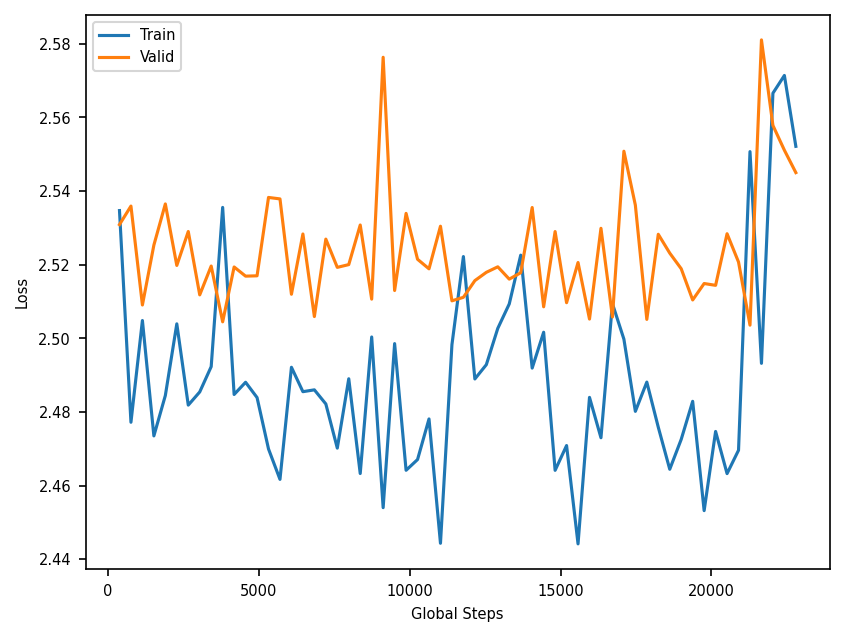

In [ ]:
### 오차 그래프로 확인
train_loss_list, valid_loss_list, global_steps_list = load_metrics('metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
### 모델 평가 함수 정의
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, test_loader):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for text, labels in test_loader:
            text = text.to(device)
            labels = labels.to(device)
            output = model(text)

            logits = output.logits  # 모델의 출력에서 로짓을 추출
            y_pred.extend(torch.argmax(logits, 1).tolist())
            y_true.extend(labels.tolist())

    print('Classification 결과:')
    print(classification_report(y_true, y_pred, labels=range(23), digits=4))

    cm = confusion_matrix(y_true, y_pred, labels=range(23))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_xticklabels([str(i) for i in range(23)], rotation=45)
    ax.set_yticklabels([str(i) for i in range(23)], rotation=45)



```
### 모델 평가
best_model = model.to(device)
load_checkpoint('model.pt', best_model)
evaluate(best_model, test_loader)
```



### KeyBERT

In [1]:
!pip install keybert

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [18]:
from keybert import KeyBERT

kw_model = KeyBERT()  # 모델 선언

# 각 리뷰에 대해 키워드 추출
df['keyword'] = df['bt_reviews'].apply(lambda x: kw_model.extract_keywords(
    x, keyphrase_ngram_range=(1,2), stop_words=stopwords
))

# 키워드를 문자열로 변환
df['keyword'] = df['keyword'].apply(lambda x: ' '.join([word for word, score in x]))

In [21]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['keyword'])
y = df['keyword2']

### y label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### train/test split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.25, shuffle=True, random_state=2024)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
rf = RandomForestClassifier(random_state=2024)
rf.fit(X_train, y_train)
pred = rf.predict(X_valid)

### valid evaluation
acc = accuracy_score(y_valid, pred)
f1 = f1_score(y_valid, pred, average='weighted')
print(f'test 정확도 : {acc:.4f}')
print(f'test f1 score : {f1:.4f}')

col = list(set(le.inverse_transform(y_valid)))
mtx = pd.DataFrame(confusion_matrix(y_valid, pred), columns=col, index=col)
mtx

(1519, 6589) (507, 6589) (1519,) (507,)
test 정확도 : 0.5582
test f1 score : 0.5524


,양이 많아요,커피가 맛있어요,특별한 메뉴가 있어요,술이 다양해요,친절해요,가성비가 좋아요,혼밥하기 좋아요,인테리어가 멋져요,음식이 맛있어요,재료가 신선해요,고기 질이 좋아요,디저트가 맛있어요,음료가 맛있어요
양이 많아요,34,1,0,3,0,2,1,1,1,1,2,0,1
커피가 맛있어요,1,45,0,0,0,0,0,0,0,0,0,0,0
특별한 메뉴가 있어요,7,0,33,1,0,3,0,0,0,3,2,0,0
술이 다양해요,1,0,0,36,0,0,0,0,0,0,0,0,0
친절해요,21,2,0,0,2,0,0,0,0,2,0,2,0
가성비가 좋아요,0,0,0,0,0,38,0,0,0,0,0,0,0
혼밥하기 좋아요,5,0,0,1,0,0,26,0,0,0,0,0,0
인테리어가 멋져요,12,0,0,4,0,0,1,2,0,1,2,1,0
음식이 맛있어요,29,0,0,0,0,1,0,1,6,3,0,0,0
재료가 신선해요,27,0,1,2,0,2,0,0,0,13,0,0,1
